In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARMA
plt.style.use('fivethirtyeight')

C:\Users\Steven Ma\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('C:/Users/Steven Ma/Desktop/Data Science Learning/Python/RSFSDPN.csv')

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')
print(df.head())
df['RSFSDPN'] = df['RSFSDPN'].astype(float)
print(df.dtypes)

            RSFSDPN
DATE               
1992-01-01    15693
1992-02-01    15835
1992-03-01    16848
1992-04-01    16494
1992-05-01    17648
RSFSDPN    float64
dtype: object


In [5]:
# Explore the data
print(df.describe())
print(df.isnull().sum())

            RSFSDPN
count    321.000000
mean   33893.800623
std    12490.596166
min    15625.000000
25%    23200.000000
50%    32757.000000
75%    42415.000000
max    63382.000000
RSFSDPN    0
dtype: int64


In [43]:
# Autocorrelation
returns = df.pct_change()
print(returns)
autocorrelation = returns['RSFSDPN'].autocorr()
print(autocorrelation)

             RSFSDPN
DATE                
1992-01-01       NaN
1992-02-01  0.009049
1992-03-01  0.063972
1992-04-01 -0.021011
1992-05-01  0.069965
1992-06-01 -0.047257
1992-07-01  0.029142
1992-08-01  0.033749
1992-09-01 -0.079886
1992-10-01  0.073455
1992-11-01 -0.053487
1992-12-01  0.045925
1993-01-01 -0.073752
1993-02-01 -0.035553
1993-03-01  0.114496
1993-04-01  0.024521
1993-05-01  0.048820
1993-06-01 -0.007535
1993-07-01  0.028054
1993-08-01  0.012414
1993-09-01 -0.063169
1993-10-01  0.035178
1993-11-01 -0.068392
1993-12-01  0.051709
1994-01-01 -0.124850
1994-02-01  0.027126
1994-03-01  0.136168
1994-04-01  0.000906
1994-05-01  0.033344
1994-06-01  0.001907
...              ...
2016-04-01  0.009105
2016-05-01  0.012430
2016-06-01 -0.042448
2016-07-01  0.024405
2016-08-01 -0.016179
2016-09-01 -0.017999
2016-10-01  0.024015
2016-11-01 -0.046778
2016-12-01  0.075561
2017-01-01 -0.084240
2017-02-01 -0.006508
2017-03-01  0.137829
2017-04-01 -0.028700
2017-05-01  0.025138
2017-06-01 -0

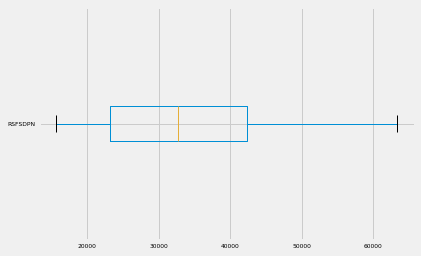

In [37]:
# Print boxplot
df.boxplot(fontsize=6, vert=False)
plt.show()

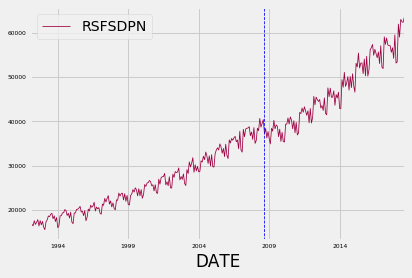

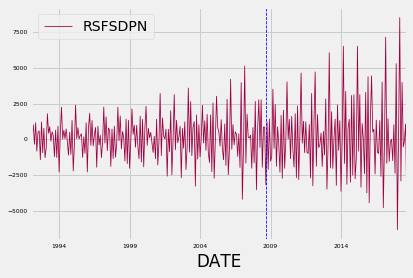

In [38]:
# Plot the original graph
ax = df.plot(colormap='Spectral', fontsize=6, linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)
plt.show()

# First differences
df_d1 = df.diff(1)
ax1 = df_d1.plot(colormap='Spectral', fontsize=6, linewidth=0.8)
ax1.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)
plt.show()

0.998756191979


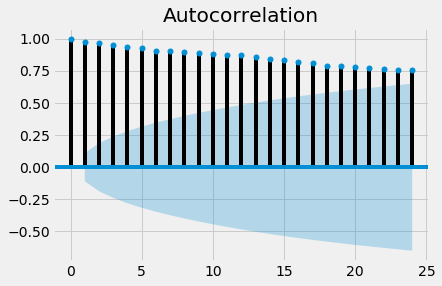

In [39]:
#Plot ACF and PACF
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['RSFSDPN'])
print(results[1])
fig = tsaplots.plot_acf(df['RSFSDPN'], lags=24)
plt.show()

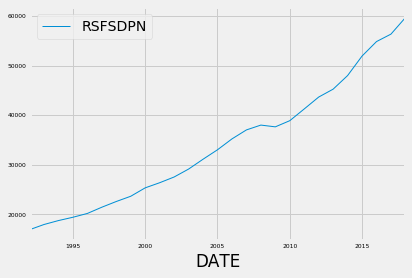

In [40]:
# Average by year
index_year = df.index.year
df_by_year = df.groupby(index_year).mean()
ax = df_by_year.plot(fontsize=6, linewidth=1)
plt.show()

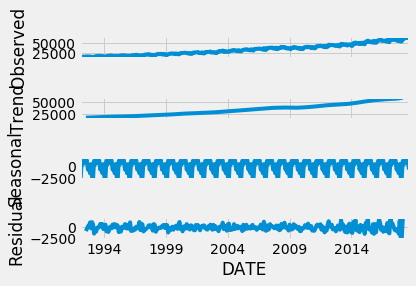

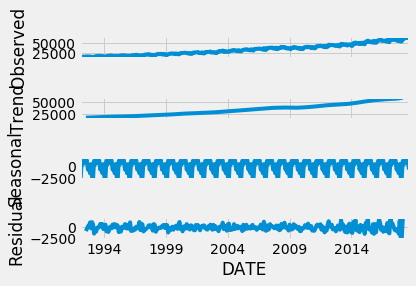

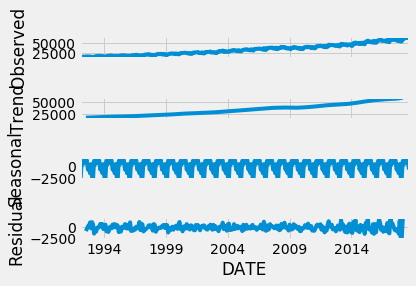

In [33]:
# Decomposition
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

In [41]:
# Estimating an AR Model
model = ARMA(df, order=(1,0))
res = model.fit()
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                RSFSDPN   No. Observations:                  321
Model:                     ARMA(1, 0)   Log Likelihood               -2906.562
Method:                       css-mle   S.D. of innovations           2056.506
Date:                Wed, 17 Oct 2018   AIC                           5819.123
Time:                        21:42:05   BIC                           5830.438
Sample:                    01-01-1992   HQIC                          5823.641
                         - 09-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.566e+04        nan        nan        nan         nan         nan
ar.L1.RSFSDPN     0.9944        nan        nan        nan         nan         nan
                                    Root

C:\Users\Steven Ma\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Steven Ma\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Steven Ma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Steven Ma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Steven Ma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


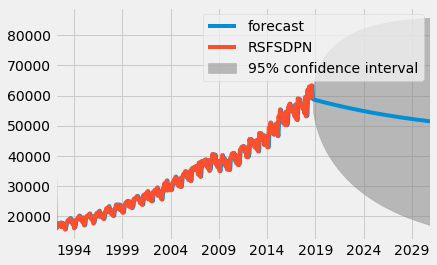

In [45]:
# Forecasting with an AR Model
res.plot_predict(start=0, end='2030')
plt.show()

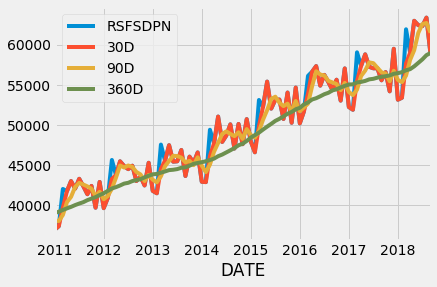

In [8]:
# Moving Average
df['30D'] = df.RSFSDPN.rolling('30D').mean()
df['90D'] = df.RSFSDPN.rolling('90D').mean()
df['360D'] = df.RSFSDPN.rolling('360D').mean()
df['2011':].plot()
plt.show()